In [1]:
%load_ext autoreload
%autoreload 2

In [75]:
from environment import Car, TrafficModel
from util.network import create_braess_network, create_double_braess_network
from util.analysis import plot_social_welfare, plot_travel_time_per_route, plot_cars_per_edge, plot_cars_per_route, draw_edge_utilization, draw_latency_params, \
    plot_latency_increase_per_edge, plot_toll_per_edge, plot_latency_per_edge

## Single Braess

In [45]:
number_of_cars = 20
number_of_steps = 20

network = create_braess_network(capacity=number_of_cars)
cars = {car_id: Car(car_id, 0, 3, anticipation_strategy='route', verbose=False) for car_id in range(number_of_cars)}

model = TrafficModel(network, cars, R=0.1, beta=1)

model.set_edge_restriction((1, 2), allowed=False)
step_stats, car_stats = model.run_single_steps(number_of_steps)

100%|██████████| 20/20 [00:00<00:00, 689.47it/s]


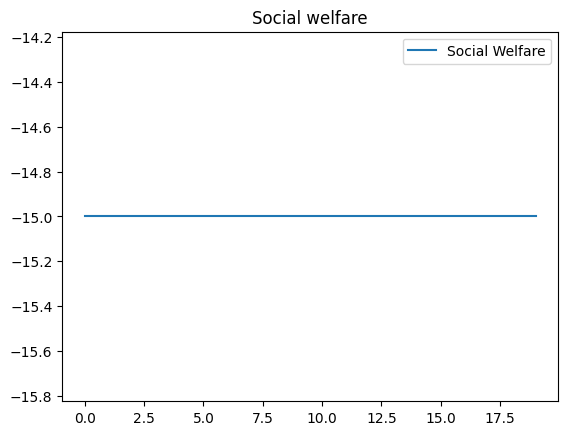

In [46]:
plot_social_welfare(step_stats)

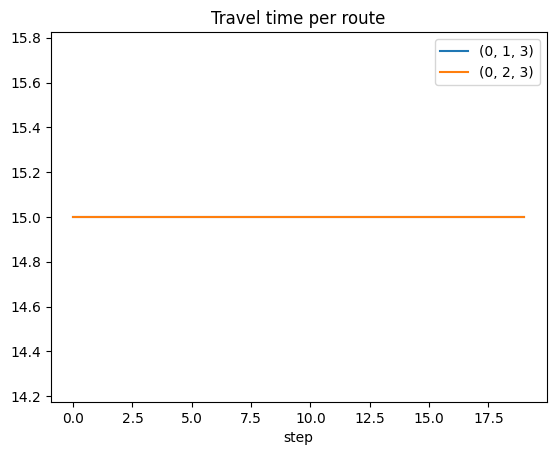

In [47]:
plot_travel_time_per_route(car_stats)

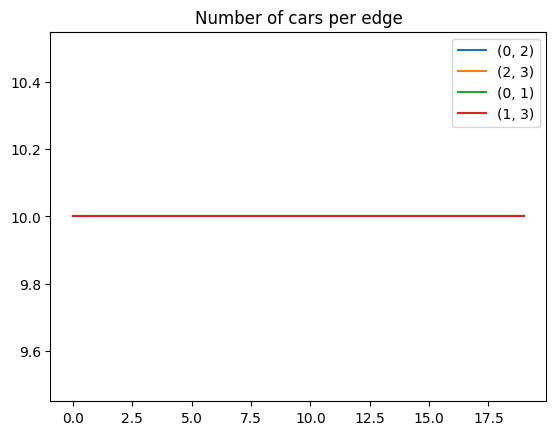

In [48]:
plot_cars_per_edge(car_stats)

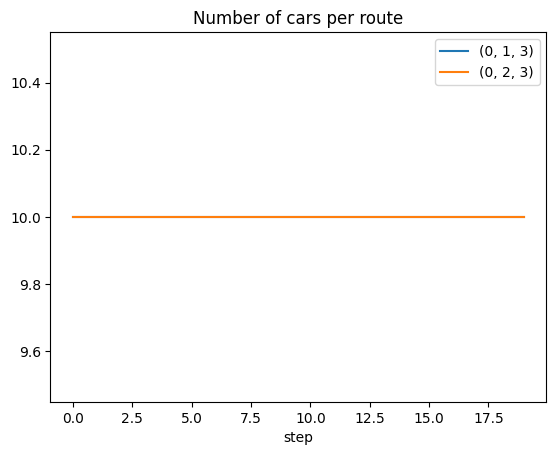

In [49]:
plot_cars_per_route(car_stats)

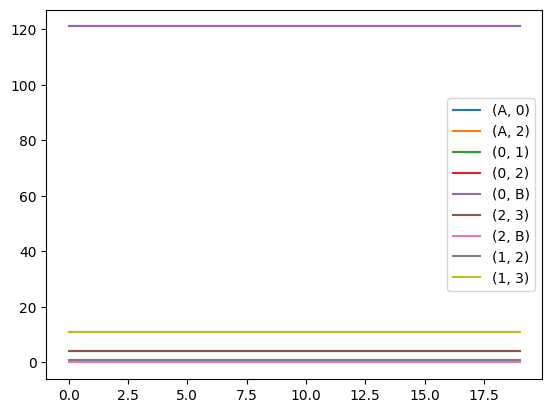

In [77]:
plot_latency_per_edge(step_stats)

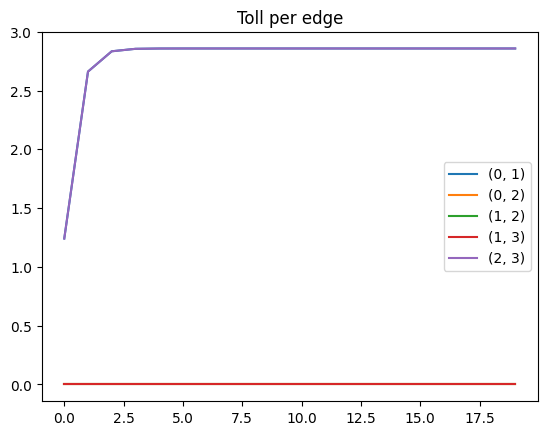

In [50]:
plot_toll_per_edge(step_stats)

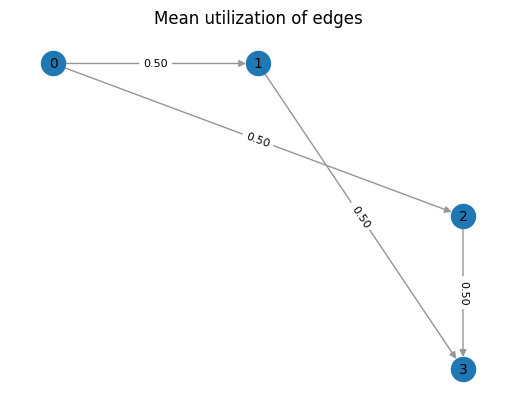

In [51]:
draw_edge_utilization(model, car_stats)

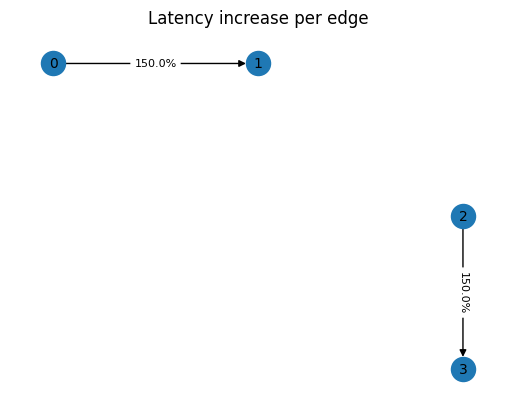

In [52]:
plot_latency_increase_per_edge(model, step_stats)

## Double Braess

In [109]:
import itertools

options = itertools.product([(0, 3), ('A', 'B')], [True, False], [True, False])

for (s, t), zero_two_open, one_two_open in options:
    number_of_cars = 20
    number_of_steps = 20

    network = create_double_braess_network(capacity=number_of_cars)
    cars = {car_id: Car(car_id, s, t, anticipation_strategy='route', verbose=False) for car_id in range(number_of_cars)}

    model = TrafficModel(network, cars, R=0.1, beta=1)

    model.set_edge_restriction((0, 2), allowed=zero_two_open)
    model.set_edge_restriction((1, 2), allowed=one_two_open)
    step_stats, car_stats = model.run_single_steps(number_of_steps)

    print(f'{s=}, {t=}, {zero_two_open=}, {one_two_open=}, welfare={(-step_stats["travel_time"]).mean(axis=1).mean()}')

100%|██████████| 20/20 [00:00<00:00, 539.64it/s]


s=0, t=3, zero_two_open=True, one_two_open=True, welfare=-17.0


100%|██████████| 20/20 [00:00<00:00, 748.84it/s]


s=0, t=3, zero_two_open=True, one_two_open=False, welfare=-15.0


100%|██████████| 20/20 [00:00<00:00, 683.60it/s]


s=0, t=3, zero_two_open=False, one_two_open=True, welfare=-17.0


100%|██████████| 20/20 [00:00<00:00, 838.65it/s]


s=0, t=3, zero_two_open=False, one_two_open=False, welfare=-18.0


100%|██████████| 20/20 [00:00<00:00, 584.81it/s]


s='A', t='B', zero_two_open=True, one_two_open=True, welfare=-25.0


100%|██████████| 20/20 [00:00<00:00, 657.77it/s]


s='A', t='B', zero_two_open=True, one_two_open=False, welfare=-26.0


100%|██████████| 20/20 [00:00<00:00, 560.87it/s]


s='A', t='B', zero_two_open=False, one_two_open=True, welfare=-25.0


100%|██████████| 20/20 [00:00<00:00, 739.05it/s]

s='A', t='B', zero_two_open=False, one_two_open=False, welfare=-24.0


In [99]:
number_of_cars = 20
number_of_steps = 20

network = create_double_braess_network(capacity=number_of_cars)
cars = {car_id: Car(car_id, 'A', 'B', anticipation_strategy='route', verbose=False) for car_id in range(number_of_cars)}

model = TrafficModel(network, cars, R=0.1, beta=1)

model.set_edge_restriction((0, 2), allowed=True)
model.set_edge_restriction((1, 2), allowed=False)
step_stats, car_stats = model.run_single_steps(number_of_steps)

100%|██████████| 20/20 [00:00<00:00, 623.91it/s]


In [106]:
(-step_stats["travel_time"]).mean(axis=1).mean()

-170.0

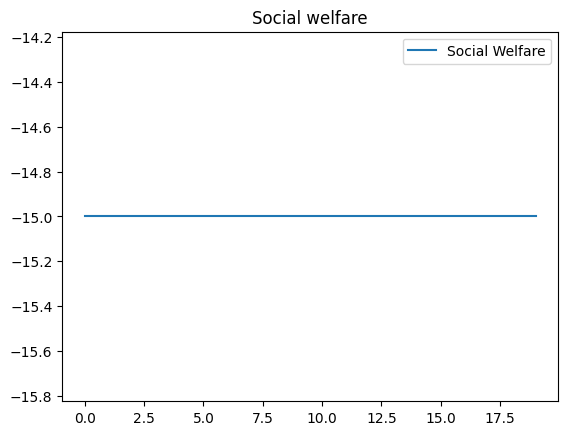

In [80]:
plot_social_welfare(step_stats)

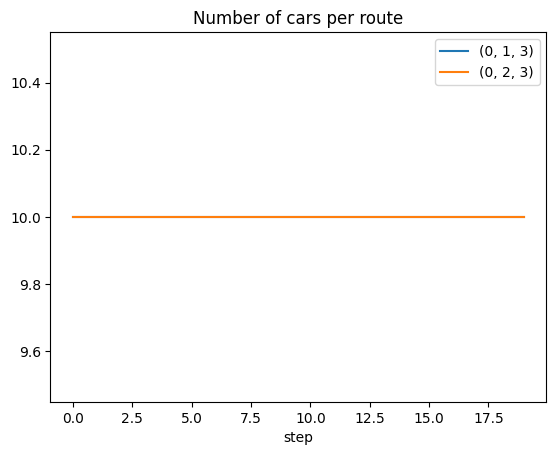

In [81]:
plot_cars_per_route(car_stats)

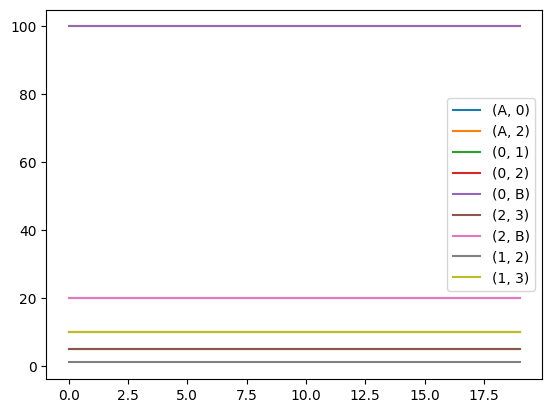

In [82]:
plot_latency_per_edge(step_stats)

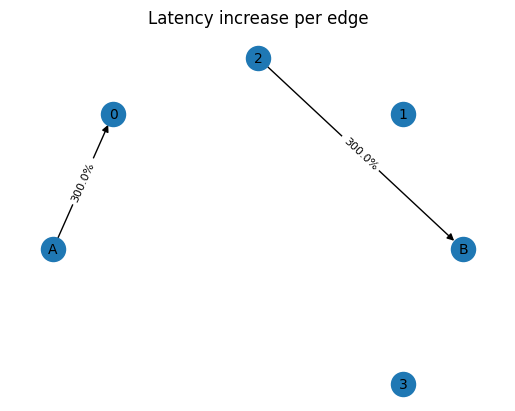

In [101]:
plot_latency_increase_per_edge(model, step_stats)